**<p style="text-align: center; font-size: 40px; font-family: 'Times New Roman';">FINDING HEAT FROM VELOCITY</p>**

**<p style="text-align: center; font-size: 20px; font-family: 'Times New Roman';">Amber Parker, Ilana Keselman, Mike Yan, Takumu Hamanaka</p>**

## Velocity Calculations

**Air density in Earth's atmosphere (below 100 km)**

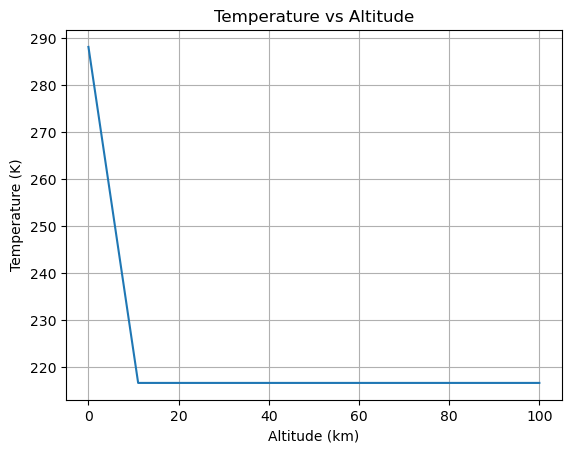

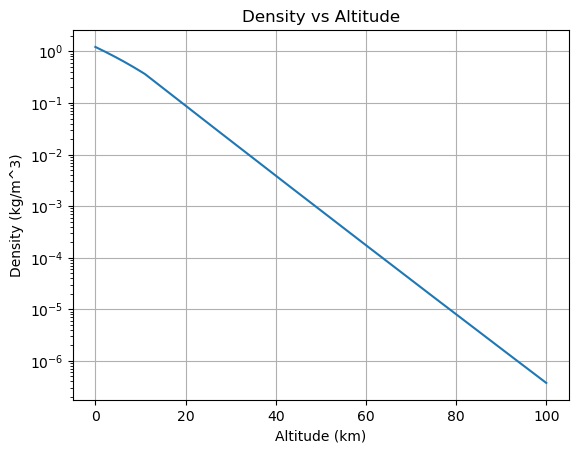

In [26]:
import numpy as np
import matplotlib.pyplot as plt

h_g = np.linspace(0, 100000, 500)  # Geopotential height from 0 to 100000 m (100 km)

def AtmosphereFunction(h_g):
    
    r_e= 6.371e6                        #earth's radius in meters
    R=287                               #m^2/K-sec, a constant
    g0=9.81                             #m/sec^2, gravity
    T0=288.15                           #degree K
    g_hG = g0 * (r_e / (r_e + h_g))**2  #gravity acceleration based on geopotential height
    h = (r_e / (r_e + h_g)) * h_g      #altitude from geopotenential altitude
    
    if h < 11000:                      #standard atmosphere math below the tropopause (m)
        h0 = 0                          #sea level altitude for comparison
        t0 = 288.15                     #sea level temperature for comparison in K
        P0 = 101325                     #sea level pressure for comparison in Pa
        rho0 = 1.225                    #sea level density for comparison in kg/m^3
        a1 = -6.5 * 10**(-3)                #temperature lapse rate in K/m
        T = T0 + a1 * (h - h0)          #temperature at altitude h
        P = P0 * (T / T0) ** (-g0 / (a1 * R))  #pressure from temperature
        rho = rho0 * (T / T0) ** (-(g0 / (a1 * R) + 1))  #density from temperature
    else:                               #standard atmosphere math above the tropopause (m)
        h0 = 11000                     #altitude at 11 km 
        P0 = 22632                  #pressure at 11 km in Pa
        rho0 = 3639 * 10**(-4)                #density at 11 km in kg/m^3
        T = 216.66                     #temperature is constant above 11 km
        P = P0 * np.exp(-g0 / (R * T) * (h - h0))  #pressure from temperature
        rho = rho0 * np.exp(-(g0 / (R * T) * (h - h0)))  #density from temperature
    
    mu0 = 1.7894e-5                    #viscosity at SL
    a = np.sqrt(1.4 * P/rho)           #speed of sound
    mu = mu0 * (T / T0) ** (1.5) * (T0 + 110.4) / (T + 110.4)  #viscosity from sutherland's formula
    return [h_g, h, T, P, rho, a, mu]

#T vs Altitude plot
T = [AtmosphereFunction(h)[2] for h in h_g]
plt.figure()
plt.plot(h_g / 1000, T)
plt.title('Temperature vs Altitude')
plt.xlabel('Altitude (km)')
plt.ylabel('Temperature (K)')
plt.grid()
plt.show()

#rho vs Altitude plot
rho = [AtmosphereFunction(h)[4] for h in h_g]
plt.figure()
plt.plot(h_g / 1000, rho)
plt.title('Density vs Altitude')
plt.xlabel('Altitude (km)')
plt.ylabel('Density (kg/m^3)')
plt.yscale('log')
plt.grid()
plt.show()

M=2     Cp_max=1.66  Cd_wave≈1.10
M=3     Cp_max=1.76  Cd_wave≈1.17
M=5     Cp_max=1.81  Cd_wave≈1.21
M=10    Cp_max=1.83  Cd_wave≈1.22


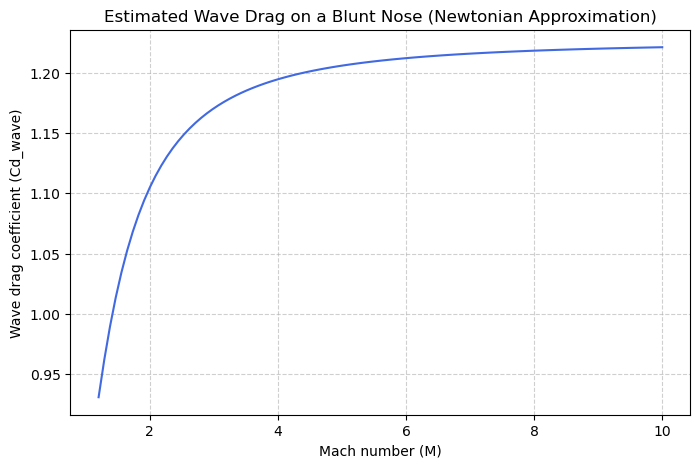

In [27]:
import numpy as np

def Cp_max(M, gamma=1.4):
    """Maximum pressure coefficient at stagnation point behind a normal shock."""
    p2_p1 = 1 + (2 * gamma / (gamma + 1)) * (M**2 - 1)
    M2_sq = (1 + 0.5 * (gamma - 1) * M**2) / (gamma * M**2 - 0.5 * (gamma - 1))
    p02_p2 = (1 + 0.5 * (gamma - 1) * M2_sq)**(gamma / (gamma - 1))
    p0_p1 = p2_p1 * p02_p2
    q_inf = 0.5 * gamma * M**2
    Cp = (p0_p1 - 1) / q_inf
    return Cp

def Cd(M, gamma=1.4):
    """Estimate wave drag coefficient for a blunt (hemispherical) nose."""
    Cp_stag = Cp_max(M, gamma)
    Cd_wave = (2/3) * Cp_stag  # Newtonian approximation for a hemisphere
    return Cd_wave

# Example usage
for M in [2, 3, 5, 10]:
    Cd_wave = Cd(M)
    print(f"M={M:<4}  Cp_max={Cp_max(M):.2f}  Cd_wave≈{Cd_wave:.2f}")



import matplotlib.pyplot as plt

M_values = np.linspace(1.2, 10, 100)
Cd_values = [Cd(M) for M in M_values]

plt.figure(figsize=(8,5))
plt.plot(M_values, Cd_values, color='royalblue')
plt.xlabel("Mach number (M)")
plt.ylabel("Wave drag coefficient (Cd_wave)")
plt.title("Estimated Wave Drag on a Blunt Nose (Newtonian Approximation)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
def RK4(uk, dt):
    y1 = func(uk)
    y2 = func(uk + dt*y1/2)
    y3 = func(uk + dt*y2/2)
    y4 = func(uk + dt*y3)
    
    return uk + dt*(y1 + 2*y2 + 2*y3 + y4)*dt/6

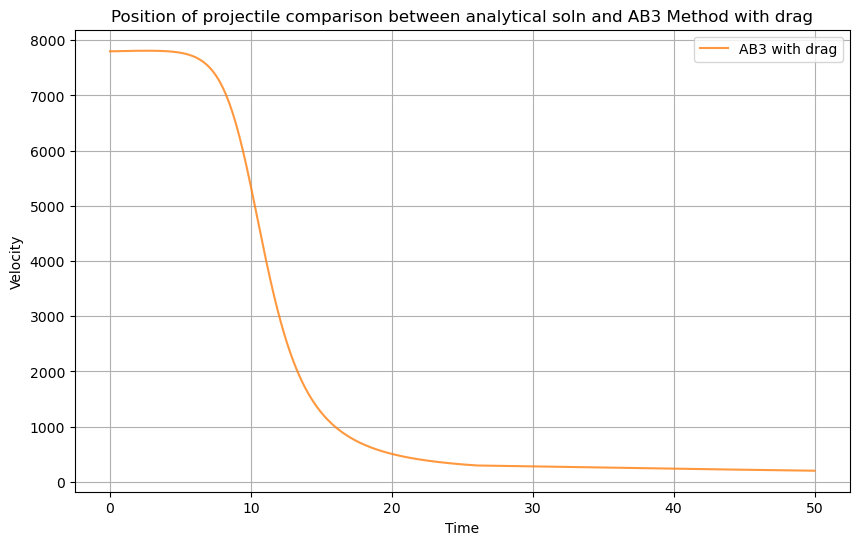

[array([ 2.75774396e+00,  9.99972423e+04,  5.51543263e+03, -5.51543753e+03]),
 array([ 5.51548778e+00,  9.99944845e+04,  5.51543236e+03, -5.51544217e+03]),
 array([ 8.27323148e+00,  9.99917268e+04,  5.51543210e+03, -5.51544681e+03]),
 array([ 1.10309750e+01,  9.99889690e+04,  5.51543183e+03, -5.51545145e+03]),
 array([ 1.37887185e+01,  9.99862113e+04,  5.51543157e+03, -5.51545609e+03]),
 array([ 1.65464618e+01,  9.99834535e+04,  5.51543130e+03, -5.51546073e+03]),
 array([ 1.93042049e+01,  9.99806957e+04,  5.51543104e+03, -5.51546537e+03]),
 array([ 2.20619480e+01,  9.99779380e+04,  5.51543077e+03, -5.51547001e+03]),
 array([ 2.48196909e+01,  9.99751802e+04,  5.51543051e+03, -5.51547465e+03]),
 array([ 2.75774336e+01,  9.99724224e+04,  5.51543024e+03, -5.51547929e+03]),
 array([ 3.03351762e+01,  9.99696647e+04,  5.51542998e+03, -5.51548393e+03]),
 array([ 3.30929187e+01,  9.99669069e+04,  5.51542971e+03, -5.51548857e+03]),
 array([ 3.58506611e+01,  9.99641491e+04,  5.51542944e+03, -5.51

In [68]:
#Your answer here
from sympy import*
u = symbols('u')
xi = [0.0, 100000.0] #m
vi = [7800/np.sqrt(2), -7800/np.sqrt(2)] #m/s
tlis = np.linspace(0, 50, 100000)
dt = tlis[1] - tlis[0]
u0 = np.array([xi[0], xi[1], vi[0], vi[1]])
g = 9.81
gma = 1.4
R = 287
#Define function 
def func(u):
    rho = AtmosphereFunction(u[1])[4] #kg/m^3 @ 200m
    T_y = AtmosphereFunction(u[1])[2]
    a = np.sqrt(gma*R*T_y)
    M = np.sqrt(u[2]**2 + u[3]**2)/a
    if M > 1:
        C = Cd(M) #referenced golf balls
    else:
        C = 0.4
    A = (10*10**(-2)/2)**2 * np.pi #assume diameter of ball is 10cm
    m = 145*10**(-3) #kg, average mass of base ball
    val = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]])@u + (((np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]])@u).T@(np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]])@u))**(1/2))*np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, -(rho*C*A)/(2*m), 0], [0, 0, 0, -(rho*C*A)/(2*m)]])@u + np.array([0, 0, 0, -g])
    return val

def AB3(uk_2, uk_1, uk, dt):
    return uk + dt*(5*func(uk_2) - 16*func(uk_1) + 23*func(uk))/12

def RK4(uk, dt):
    y1 = func(uk)
    y2 = func(uk + dt*y1/2)
    y3 = func(uk + dt*y2/2)
    y4 = func(uk + dt*y3)
    
    return uk + (y1 + 2*y2 + 2*y3 + y4)*dt/6

def FE(uk, dt):
    f = func(uk)
    return uk + dt*f


u1 = FE(u0, dt)
u2 = FE(u1, dt)
ulis = [] #[u0, u1, u2]

#uk2 = u0
#uk1 = u1
uk = u0 #u2
for i in range(len(tlis)):
    ukp1 = RK4(uk, dt) #AB3(uk2, uk1, uk, dt)
    ulis.append(ukp1)
    #ukcpy = uk.copy()
    #uk1cpy = uk1.copy()
    #uk2cpy = uk2.copy()
    uk = ukp1
    #uk1 = ukcpy
    #uk2 = uk1cpy

xlis_AB3 = []
ylis_AB3 = []
vlis = []
for i in ulis:
    xlis_AB3.append(float(i[0]))
    ylis_AB3.append(float(i[1]))
    vlis.append(np.sqrt(i[2]**2 + i[3]**2))
#plotting and comparing methods --------------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
#plt.plot(xlis_a, ylis_a, label='analytical solution without drag', color='tab:blue', alpha=0.8)
plt.plot(tlis, vlis, label='AB3 with drag', color='tab:orange', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Position of projectile comparison between analytical soln and AB3 Method with drag')
plt.legend()
plt.grid(True)
plt.show()

ulis


In [45]:
xi = [0.0, 1000.0] #m
vi = [400, -1000] #m/s
tlis = np.linspace(0, 10, 100000)
u = np.array([  17.3504426 ,  956.59026274,   97.94043662, -245.48750871])
T_y = AtmosphereFunction(u[1])[2]
a = np.sqrt(gma*R*T_y)
M = np.sqrt(u[2]**2 + u[3]**2)/a
M

0.7852812835150706